# Applied Mathematics 115: Mathematical Modeling  
---
*2024 Spring / Full Term*

**Meeting Time:**  
Tuesday 10:30 AM - 11:45 AM  
Thursday 10:30 AM - 11:45 AM
<br>
<br>

**Instructors:**  
*Michael P. Brenner* (Pierce Hall 313) brenner@seas.harvard.edu  
Francesco Mottes fmottes@seas.harvard.edu  

**Teaching Fellows:**  
Henry Bae henrybae@college.harvard.edu  
Sarah Martinson sarahmartinson@g.harvard.edu  
Shruti Sharma ssharma1@g.harvard.edu  
Al Shodiev alshodiev@college.harvard.edu  
Alex Sullivan alexsullivan@college.harvard.edu  
Matt Tibbitts mtibbitts@college.harvard.edu  





In [1]:
# Imports
import numpy as np
np.random.seed(0)


from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})

import scipy

import yfinance as yf
import pandas as pd

# Asset Prices and Geometric Brownian Motion 

Geometric Brownian Motion (GBM) is a continuous-time stochastic process that is commonly used in financial mathematics to model the dynamics of various assets, including stock prices. It is defined by the stochastic differential equation (SDE):

$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

In this equation, $ S_t $ represents the asset price at time $ t $, $ \mu $ is the drift coefficient (representing the expected return of the asset), $ \sigma $ is the volatility coefficient (representing the risk or uncertainty), and $ dW_t $ is an increment of a Wiener process or standard Brownian motion. $ dW_t $ can be thought of as $ \sqrt{dt} \times \text{Normal}(0,1) $, where Normal(0,1) is a standard normal distribution. This model assumes that the percentage change in the asset price is normally distributed with mean $ \mu dt $ and variance $ \sigma^2 dt $.

One of the key properties of GBM is that it produces log-normally distributed asset prices over time. This is because the logarithm of asset prices follows a Brownian motion with drift. The solution to the GBM SDE can be expressed as:

$$ S_t = S_0 \exp \left( \left( \mu - \frac{1}{2} \sigma^2 \right) t + \sigma W_t \right) $$

Where $ S_0 $ is the initial asset price at $ t=0 $. This formula shows that the asset price at any future time $ t $ depends on the initial price $ S_0 $, the drift and volatility coefficients, and the path taken by the Wiener process up to time $ t $.


In [2]:
T = 500 # total time
dt = .01 # time step

mu = 0.01 # drift
sigma = 1. # volatility (diffusion)

# Initial stock price
S = 1

# Generate time steps
times = np.arange(0, T, dt)

# Simulate stock price
S_log = [np.log(S)]  # Initial log price

for i in range(1, len(times)):

    dW = np.sqrt(dt)*np.random.normal(0, 1)  # Brownian motion

    # Change in log price (follows standard Brownian motion)
    d_logS = mu*dt + sigma*dW 

    S_log += [S_log[i - 1] + d_logS]


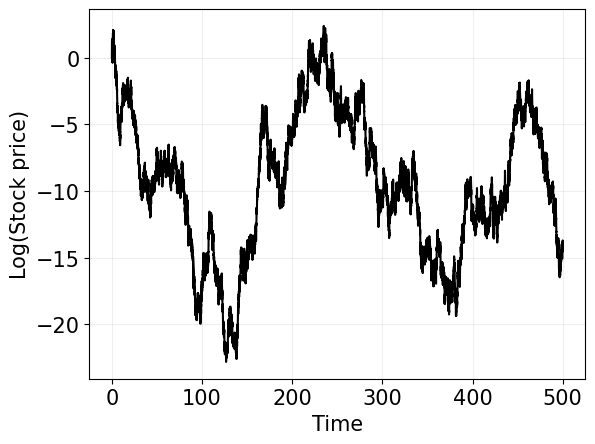

In [3]:
plt.plot(times, S_log, 'k')


plt.xlabel('Time')
plt.ylabel('Log(Stock price)')

plt.grid(alpha=.2)

# Pricing European Options

**European Call**

A European call option is a financial contract that gives the holder the right, but not the obligation, to buy an underlying asset at a specified strike price $K$ on a specified expiration date $T$. The value of a European call option at expiration can be mathematically represented as:

$$ \text{Call Payoff} = \max(S_T - K, 0) $$

where $S_T$ is the price of the underlying asset at expiration. This formula reflects that the option holder will exercise the option only if it is profitable, i.e., if $S_T > K$.

**European Put**

A European put option is a financial contract that gives the holder the right, but not the obligation, to sell an underlying asset at a specified strike price $K$ on a specified expiration date $T$. The value of a European put option at expiration can be mathematically represented as:

$$ \text{Put Payoff} = \max(K - S_T, 0) $$

where $S_T$ is the price of the underlying asset at expiration. This formula indicates that the option holder will exercise the option only if it is profitable, i.e., if $K > S_T$. In such a scenario, the holder can sell the asset at the higher strike price $K$, even though its market value is lower ($S_T$).


In [4]:
## Parameters

S0 = 100     # Initial stock price
K = 105      # Strike price
T = 1     # Time to expiration (in years)
r = 0.05     # Risk-free interest rate
sigma = 0.2  # Volatility

## Monte Carlo Pricing

In order to calculate the expected payoff of a European call option at expiration, we can simulate the future stock price at expiration for a large number of stochastic realizations. The expected payoff is then the average of all of the sampled payoffs.

In Monte Carlo simulations for option pricing, the stock price update rule for Geometric Brownian Motion (GBM) is derived from Ito's Lemma. GBM is defined by the stochastic differential equation (SDE):

$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

where $S_t$ is the stock price, $\mu$ is the drift coefficient, $\sigma$ is the volatility coefficient, and $dW_t$ represents the Wiener process increment.

Ito's Lemma, which is fundamental in stochastic calculus, states that for a twice-differentiable function $f(t, S_t)$ the differential $df(t, S_t)$ is given by:


$$ df(t, S_t) = \left( \frac{\partial f}{\partial t} + \mu S_t \frac{\partial f}{\partial S_t} + \frac{1}{2} \sigma^2 S_t^2 \frac{\partial^2 f}{\partial S_t^2} \right) dt + \sigma S_t \frac{\partial f}{\partial S_t} dW_t $$

Let's apply Ito's Lemma to the function $f(t, S_t) = \ln(S_t)$. We have partial derivatives:

$$ \frac{\partial f}{\partial t} = 0, \quad \frac{\partial f}{\partial S_t} = \frac{1}{S_t}, \quad \text{and} \quad \frac{\partial^2 f}{\partial S_t^2} = -\frac{1}{S_t^2} $$

Substituting these into the Ito's Lemma formula gives:

$$ d\ln(S_t) = \left( \mu - \frac{1}{2} \sigma^2 \right) dt + \sigma dW_t $$

This is an SDE for $\ln(S_t)$. To simulate the stock price over a small time interval $\Delta t$, we integrate both sides:

$$ \ln(S_{t+\Delta t}) - \ln(S_t) = \left( \mu - \frac{1}{2} \sigma^2 \right) \Delta t + \sigma \sqrt{\Delta t} Z $$

Giving at last the update rule for the log of the stock price:

$$ \ln(S_{t+\Delta t}) = \ln(S_t) + \left( \mu - \frac{1}{2} \sigma^2 \right) \Delta t + \sigma \sqrt{\Delta t} Z $$

Here, $Z$ is a standard normal random variable representing the integrated Wiener process over $\Delta t$. Exponentiating both sides we get the update rule for the stock price itself.


In the code below we estimate the current price of fictitious call options. After computing the payoffs for each simulated asset price path using GBM, we need to discount these payoffs to the present value (last line of the code):

$$ \text{Call Price} = e^{-rT} \times \text{Mean(Call Payoffs)} $$

Here, $e^{-rT}$ is the discount factor, where $r$ is the risk-free interest rate and $T$ is the time to expiration. This factor is used to convert future payoffs to their present value, reflecting the time value of money. The mean of the discounted payoffs from all the simulated paths provides an estimate of the current price of the European call option. This approach ensures that the option pricing accounts for both the probabilistic nature of the asset's future price and the time value of money.



In [5]:
def monte_carlo_pricing(S0, K, T, r, sigma, n_simulations, n_sim_steps, option_type='call'):

    dt = T / n_sim_steps

    payoffs = []
    for _ in range(n_simulations):

        ### We perform RW in the log space (numerically more stable)
        logS = np.log(S0)
        for _ in range(n_sim_steps):

            Z = np.random.normal(0, 1)
            logS += (r - .5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z

        # convert back to price S
        S = np.exp(logS)

        # payoff at maturity
        if 'call' == option_type:
            payoff = max(0, S - K)

        elif 'put' == option_type:
            payoff = max(0, K - S)

        else:
            raise ValueError('option_type must be "call" or "put"')

        payoffs += [payoff]

    # discount back to present value
    price = np.exp(-r * T) * np.mean(payoffs)

    return price, payoffs

In [6]:
num_simulations = 10000  # Number of simulations
n_sim_steps = 100          # Number of time steps


# Calculate option price using Monte Carlo simulation
monte_carlo_price, call_payoffs = monte_carlo_pricing(S0, K, T, r, sigma, num_simulations, n_sim_steps)

print('Monte Carlo Price:', monte_carlo_price)

Monte Carlo Price: 8.034687531291162


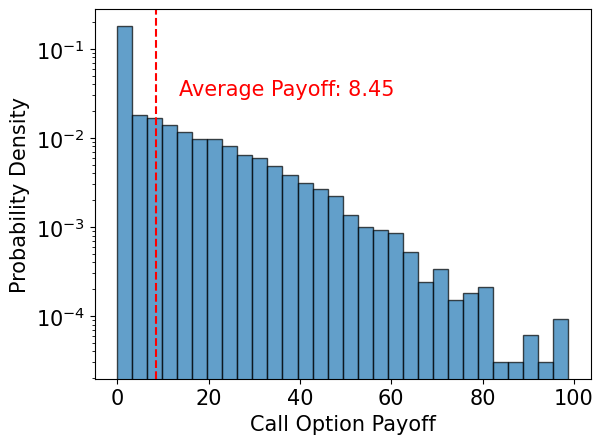

In [7]:
# Create histogram of call payoffs
plt.hist(call_payoffs, bins=30, density=True, log=True, edgecolor='black', alpha=0.7)

# Plot vertical dashed line for the mean
plt.axvline(x=np.mean(call_payoffs), color='red', linestyle='--')

# Print the mean value
plt.text(np.mean(call_payoffs) + 5, 0.03, f'Average Payoff: {np.mean(call_payoffs):.2f}', color='red')

# Add labels and title
plt.xlabel('Call Option Payoff')
plt.ylabel('Probability Density')


plt.show()

## Black Scholes Formula

Let's now compare the price estimate obtained from the Monte Carlo simulation with call option price predicted by the Black-Scholes formula:

$$ C = S_0 N(d_1) - K e^{-rT} N(d_2) $$

where:

$$ d_1 = \frac{\ln(S_0/K) + (r + \sigma^2/2)T}{\sigma \sqrt{T}} $$
$$ d_2 = d_1 - \sigma \sqrt{T} $$

$N(x)$ is the cumulative distribution function of the standard normal distribution, $S_0$ is the current price of the underlying asset, $K$ is the strike price, $r$ is the risk-free interest rate, $\sigma$ is the volatility of the underlying asset, and $T$ is the time to expiration.



In [8]:
# Function to calculate the Black-Scholes option price
def black_scholes(S, K, T, r, sigma, option_type='call'):
    '''
    S: stock price
    K: strike price
    T: time to maturity in years
    r: risk-free rate
    sigma: volatility of the stock
    option_type: "call" or "put"
    '''
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * scipy.stats.norm.cdf(d1) - K * np.exp(-r * T) * scipy.stats.norm.cdf(d2)
        
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * scipy.stats.norm.cdf(-d2) - S * scipy.stats.norm.cdf(-d1)

    return option_price

In [9]:
# Calculate the Black-Scholes price
black_scholes_price = black_scholes(S0, K, T, r, sigma, option_type='call')

print("Black-Scholes Price:", black_scholes_price)

Black-Scholes Price: 8.021352235143176


# META Options Pricing

Let's consider now options issued on Meta Platforms Inc. (META) with the closest expiration date. We can compare market prices with the ones obtained from the Black-Scholes formula. 

In [10]:
import yfinance as yf
import datetime
import pytz # Timezone library

In [11]:
# Estimate for the risk-free rate (e.g., yield on 10-year Treasury note)
risk_free_rate = 0.04  # current value ~ 4%

# Estimate for annual volatility (can be calculated based on historical data)
# We use here for simplicity "ground truth" implied volatility from internet sources
volatility = .3  # ~ 30%

In [12]:
### GET MARKET DATA FROM YAHOO FINANCE ###


# Fetching data for Meta Platforms Inc. (META)
meta = yf.Ticker('META')

# Get current stock price
current_price = meta.history(period='1d')['Close'].iloc[-1]

# Get options data for the nearest expiration date
options_data = meta.option_chain(meta.options[0])

calls = options_data.calls
puts = options_data.puts

print(f'Current stock price:\t{current_price}')
print(f'Options maturity date:\t{meta.options[0]}')

/Users/francesco/Programs/mambaforge/envs/jax-cpu/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Current stock price:	473.32000732421875
Options maturity date:	2024-02-23


In [13]:
### CALCULATE BLACK-SCHOLES PRICES ###


# Calculate Black-Scholes prices for each option type
def calculate_bs_prices(options_df, option_type):

    now = datetime.datetime.now(pytz.utc)  # make 'now' timezone-aware

    prices = []
    for _, option in options_df.iterrows():

        T = (now - option['lastTradeDate']).days / 365
        
        bs_price = black_scholes(current_price, 
                                 option['strike'], 
                                 T, 
                                 risk_free_rate, 
                                 volatility, 
                                 option_type
                                 )

        prices += [bs_price]

    return np.array(prices)


# Calculate for calls and puts and add to the dataframes
calls['BS_Price'] = calculate_bs_prices(calls, 'call')
puts['BS_Price'] = calculate_bs_prices(puts, 'put')

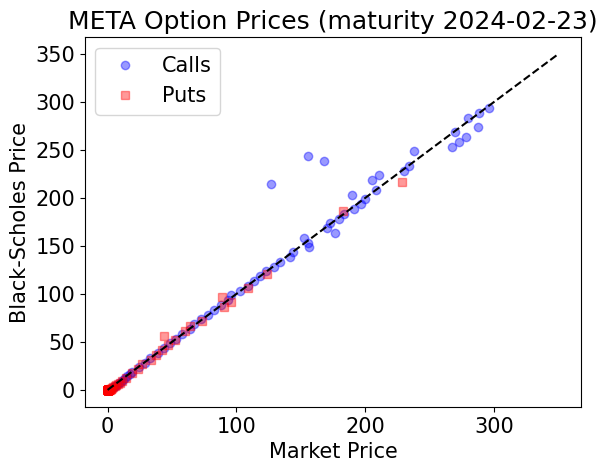

In [14]:
### PLOT PREDICTED VS. MARKET PRICES ###

plt.plot(calls['lastPrice'], calls['BS_Price'], 'bo', alpha=.4, label='Calls')
plt.plot(puts['lastPrice'], puts['BS_Price'], 'rs', alpha=.4, label='Puts')


# Add a line for perfect correlation
x = np.linspace(0, 350, 5)
plt.plot(x, x, 'k--')

# Labels and title
plt.xlabel('Market Price')
plt.ylabel('Black-Scholes Price')

plt.title(f'META Option Prices (maturity {meta.options[0]})')

plt.legend();